# Nama-nama Kelompok 4 Volkerding
1. Lince Febriana
2. Yessy Rahma Utami
3. Adinda Azzahra
4. Regita Alzarinna
5. Wafiq Khotimah Nasution
6. Muhammad Yogi

# Mengimplementasikan Link API Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

# Klasifikasi Buah-buahan dan Sayuran

## Download Dataset

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [01:04<00:00, 36.8MB/s]
100% 1.98G/1.98G [01:04<00:00, 33.2MB/s]


In [ ]:
!unzip '/content/fruit-and-vegetable-image-recognition.zip'  -d '/content/fruit-and-vegetable-image-recognition'

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_10.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_2.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_3.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_4.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_5.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_6.JPG  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_7.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_8.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/apple/Image_9.jpg  
  inflating: /content/fruit-and-vegetable-image-recognition/test/banana/Image_1.jpg  
  

# Data Acquisition

In [ ]:
import os
import zipfile
local_zip = '/content/fruit-and-vegetable-image-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/train')

['carrot',
 'spinach',
 'raddish',
 'peas',
 'lemon',
 'pear',
 'chilli pepper',
 'onion',
 'kiwi',
 'orange',
 'lettuce',
 'garlic',
 'tomato',
 'beetroot',
 'banana',
 'turnip',
 'sweetpotato',
 'capsicum',
 'sweetcorn',
 'eggplant',
 'ginger',
 'bell pepper',
 'pineapple',
 'watermelon',
 'soy beans',
 'corn',
 'pomegranate',
 'apple',
 'grapes',
 'mango',
 'cucumber',
 'jalepeno',
 'cauliflower',
 'cabbage',
 'paprika',
 'potato']

In [ ]:
os.listdir('/tmp/validation')

['carrot',
 'spinach',
 'raddish',
 'peas',
 'lemon',
 'pear',
 'chilli pepper',
 'onion',
 'kiwi',
 'orange',
 'lettuce',
 'garlic',
 'tomato',
 'beetroot',
 'banana',
 'turnip',
 'sweetpotato',
 'capsicum',
 'sweetcorn',
 'eggplant',
 'ginger',
 'bell pepper',
 'pineapple',
 'watermelon',
 'soy beans',
 'corn',
 'pomegranate',
 'apple',
 'grapes',
 'mango',
 'cucumber',
 'jalepeno',
 'cauliflower',
 'cabbage',
 'paprika',
 'potato']

In [ ]:
# Directory with our training dandelion pictures
train_kiwi_dir = os.path.join('/tmp/train/kiwi')

# Directory with our training grass pictures
train_potato_dir = os.path.join('/tmp/train/potato')

# Directory with our validation dandelion pictures
validation_kiwi_dir = os.path.join('/tmp/validation/kiwi')

# Directory with our validation grass pictures
validation_potato_dir = os.path.join('/tmp/validation/potato')

In [ ]:
train_kiwi_names = os.listdir(train_kiwi_dir)
print(train_kiwi_names[:10])

train_potato_names = os.listdir(train_potato_dir)
print(train_potato_names[:10])

validation_kiwi_names = os.listdir(validation_kiwi_dir)
print(validation_kiwi_names[:10])

validation_potato_names = os.listdir(validation_potato_dir)
print(validation_potato_names[:10])

['Image_82.jpg', 'Image_42.jpg', 'Image_19.jpg', 'Image_28.jpg', 'Image_100.jpg', 'Image_35.jpg', 'Image_64.png', 'Image_78.jpg', 'Image_24.jpg', 'Image_73.jpg']
['Image_82.jpg', 'Image_90.png', 'Image_88.jpeg', 'Image_45.jpg', 'Image_28.jpg', 'Image_100.jpg', 'Image_78.jpg', 'Image_73.jpg', 'Image_5.JPG', 'Image_12.jpg']
['Image_10.jpg', 'Image_8.jpg', 'Image_7.jpg', 'Image_9.jpg', 'Image_5.jpg', 'Image_3.jpg', 'Image_2.jpg', 'Image_6.jpg', 'Image_4.jpg', 'Image_1.jpg']
['Image_5.JPG', 'Image_10.jpg', 'Image_8.jpg', 'Image_7.jpg', 'Image_9.jpg', 'Image_3.jpg', 'Image_2.jpg', 'Image_6.jpg', 'Image_4.jpg', 'Image_1.jpg']


In [ ]:
print('total training kiwi images:', len(os.listdir(train_kiwi_dir)))
print('total training potato images:', len(os.listdir(train_potato_dir)))

print('total validation kiwi images:', len(os.listdir(validation_kiwi_dir)))
print('total validation potato images:', len(os.listdir(validation_potato_dir)))

total training kiwi images: 88
total training potato images: 77
total validation kiwi images: 10
total validation potato images: 10


# Data Exploration

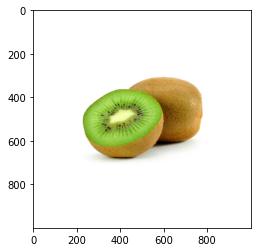

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/train/kiwi/Image_1.jpg')
imgplot = plt.imshow(img)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

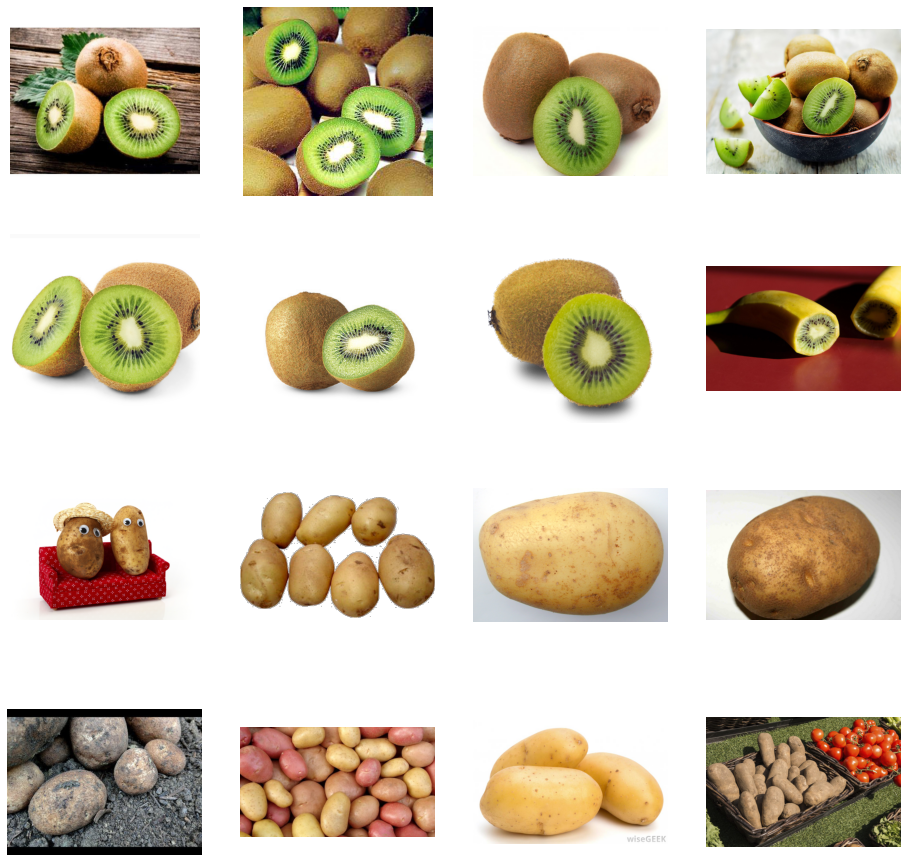

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_kiwi_pic = [os.path.join(train_kiwi_dir, fname) 
                for fname in train_kiwi_names[pic_index-8:pic_index]]
next_potato_pic = [os.path.join(train_potato_dir, fname) 
                for fname in train_potato_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_kiwi_pic + next_potato_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preprocessing

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi training dataset
train_datagen = ImageDataGenerator (rescale = 1.0/255., rotation_range = 40,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak perlu augmentasi
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
          '/tmp/train/',
          classes = ['kiwi', 'potato'],
          target_size=(224, 224), #ubah ke 224 
          batch_size=120,
          class_mode="binary")

validation_generator =  validation_datagen.flow_from_directory(
          '/tmp/validation/',
          classes = ['kiwi', 'potato'], 
          target_size=(224, 224), # Ubah ke 224
          batch_size=20,
          class_mode='binary',
          shuffle=False)

Found 165 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Modelling

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('/tmp/train')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest')

validation_dir = os.path.join('/tmp/validation')
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=16,
    class_mode='binary')
    
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=8,
    class_mode='binary')

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


# Membangun arsitektur dari Pre-trained model

In [ ]:
from tensorflow.keras.applications import vgg16

model = vgg16.VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False, # menghapus layer terakhir secara otomatis
                   weights = 'imagenet')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer kelima
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)      

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(train_generator,
                    #steps_per_epoch=8,
                    epochs=10,
                    verbose=2,
                    validation_data=validation_generator,
                    #validation_steps=8
                    )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


195/195 - 296s - loss: -3.1705e+13 - accuracy: 0.0241 - val_loss: -3.4595e+14 - val_accuracy: 0.0256 - 296s/epoch - 2s/step
Epoch 2/10
195/195 - 291s - loss: -3.3563e+16 - accuracy: 0.0241 - val_loss: -1.6653e+17 - val_accuracy: 0.0256 - 291s/epoch - 1s/step
Epoch 3/10
195/195 - 303s - loss: -1.4435e+18 - accuracy: 0.0241 - val_loss: -4.5089e+18 - val_accuracy: 0.0256 - 303s/epoch - 2s/step
Epoch 4/10
195/195 - 305s - loss: -1.6522e+19 - accuracy: 0.0241 - val_loss: -3.9219e+19 - val_accuracy: 0.0256 - 305s/epoch - 2s/step
Epoch 5/10
195/195 - 287s - loss: -9.8004e+19 - accuracy: 0.0241 - val_loss: -1.9399e+20 - val_accuracy: 0.0256 - 287s/epoch - 1s/step
Epoch 6/10
195/195 - 288s - loss: -3.9300e+20 - accuracy: 0.0241 - val_loss: -6.8950e+20 - val_accuracy: 0.0256 - 288s/epoch - 1s/step
Epoch 7/10
195/195 - 282s - loss: -1.2023e+21 - accuracy: 0.0241 - val_loss: -1.9282e+21 - val_accuracy: 0.0256 - 282s/epoch - 1s/step
Epoch 8/10
195/195 - 285s - loss: -3.0519e+21 - accuracy: 0.0241 -

In [ ]:
model.save('model.h5')

# Akurasi

In [ ]:
model.evaluate(validation_generator)

12/44 [=======>......................] - ETA: 24s - loss: nan - accuracy: 0.0312

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


44/44 [==============================] - 31s 697ms/step - loss: nan - accuracy: 0.0285


[nan, 0.028490029275417328]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

38/44 [========================>.....] - ETA: 3s

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


44/44 [==============================] - 27s 599ms/step


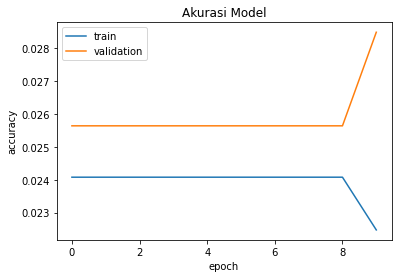

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

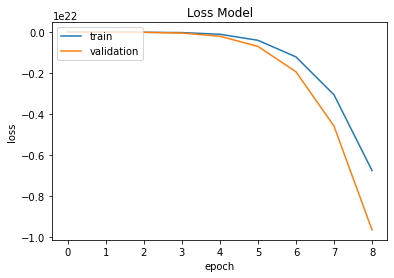

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediksi

In [ ]:
validation_generator.class_indices

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

Saving kiwi.jpg to kiwi.jpg
0
kiwi.jpg ini adalah kiwi


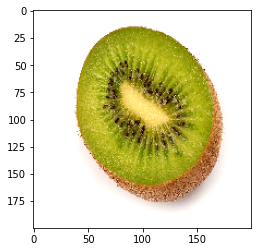

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  predict = model.predict(images)
  classes = np.argmax(predict)
  print(classes)
  if classes == 0:
    print(fn + " ini adalah kiwi")
  elif classes == 1:
    print(fn + " ini adalah potato")